# Importing packages and data

In [115]:
# Importing libraries
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

# scikit learn packages 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # vectorizer
from sklearn.model_selection import train_test_split # For splitting into test and train data
from sklearn.naive_bayes import MultinomialNB # Simple model for multinomial classification
from sklearn.linear_model import SGDClassifier # SGD classifier - better model for classification
from sklearn.pipeline import Pipeline # Pipeline framework
from sklearn import metrics # For metric evaluation 
from sklearn.model_selection import GridSearchCV # Library that allows optimization of hyperparameters



In [99]:
# Path to the data
data_path = "/Users/gustavhelms/Documents/Cognitive Science/5_semester/Bachelor/political_polarization/Folketinget-Scraping/data/folketinget_2019_2021_raw.csv"
# Importing data - only a subset 
df = pd.read_csv(data_path, nrows = 10000)

# Inspecting the data

In [100]:
df.head() 

,Title,id,Samling,Nr,Titel,Dato,speaker_id,text,Date,doc_id,Name,Year,Period,Parti
0,Adsbøl,20201_M108_referat,20201,108,"Referat af møde 108 den 4. maj, 2021 kl. 13.00",04-05-2021,42762,"der fik i lige reddet mig . ja, det var en spæ...",2021-05-04T20:12:00Z,36438,Karina Adsbøl,2021,2019-,Dansk Folkeparti
1,Adsbøl,20201_M108_referat,20201,108,"Referat af møde 108 den 4. maj, 2021 kl. 13.00",04-05-2021,42788,jeg vil så gerne blive lidt længere . men vi g...,2021-05-04T20:24:00Z,36466,Karina Adsbøl,2021,2019-,Dansk Folkeparti
2,Ahlers,20201_M114_referat,20201,114,"Referat af møde 114 den 11. maj, 2021 kl. 14.30",11-05-2021,45782,hvis hr. tommy ahlers var gået ind i forhandli...,2021-05-11T17:05:00Z,39795,Tommy Ahlers,2021,2019-,Venstre
3,Aki-Matilda Høegh-Dam,20201_M110_referat,20201,110,"Referat af møde 110 den 6. maj, 2021 kl. 10.00",06-05-2021,44397,"vi behandler i dag et beslutningsforslag, hvor...",2021-05-06T14:32:00Z,38255,Aki-Matilda Høegh-Dam,2021,2019-,Siumut
4,Aki-Matilda Høegh-Dam,20201_M110_referat,20201,110,"Referat af møde 110 den 6. maj, 2021 kl. 10.00",06-05-2021,44413,"tak. jeg finder det interessant, at df i bemær...",2021-05-06T14:47:00Z,38274,Aki-Matilda Høegh-Dam,2021,2019-,Siumut


In [102]:
df.shape

(10000, 14)

# Extracting the text and labels

In [83]:
# Saving the relevant data as a list
X, y = df["text"], df["Parti"]

# Vectorizing and transforming the text into matrix

In [84]:
# Defining and importing vectorizer
tfidf_vect = TfidfVectorizer()

# Transforming the text in the training with the vectorizer into a matrix
X_tfidf = tfidf_vect.fit_transform(X)

# Splitting into train and test data sets

In [66]:
# Splitting into train and text
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.10, random_state=42)

# Training a classifier on the whole data set

In [86]:
clf = MultinomialNB().fit(X_tfidf, y)
pred = clf.predict(X_tfidf)


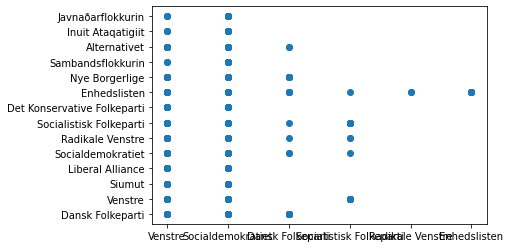

In [87]:
import matplotlib.pylab as plt
plt.scatter(pred, y)

# Incorporating the framework to a pipeline

In [95]:
# The pipeline allows to design a common framework for the preprocessing of the data - this makes it easily scalable
text_clf = Pipeline([
('vect', CountVectorizer()),
('tfidf', TfidfTransformer()),
('clf', MultinomialNB())]) # Using NB as classifier

In [98]:
# Fitting and predicting through the pipeline
predicted = text_clf.fit(X, y).predict(y) 

# Evaluating the performance of the classifier 
np.mean(predicted == y)

0.44769011629143013

This performance sucks - lets try with the SGD classifier

In [133]:
# Creating a new pipe with the SGD classifier
pipe = Pipeline([
('vect', CountVectorizer()),
('tfidf', TfidfTransformer()),
('SGD', SGDClassifier(n_jobs=-1,loss='log', 
                      penalty='l2', shuffle=True,
                      class_weight = 'balanced'))]) 

In [134]:
# Evaluating the new model

# Fitting and predicting through the new pipeline
predicted_SGD = text_clf.fit(X, y).predict(y) 

# Evaluating the performance of the classifier - no better performance hmmm
np.mean(predicted_SGD == y)

0.44769011629143013

# Investigating the metrics to evaluate the model

In [135]:
print(metrics.classification_report(y, predicted_SGD,
                                    target_names= y.unique()))

/Users/gustavhelms/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gustavhelms/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                             precision    recall  f1-score   support

           Dansk Folkeparti       0.00      0.00      0.00      1489
                    Venstre       0.00      0.00      0.00      6354
                     Siumut       0.00      0.00      0.00      1421
           Liberal Alliance       0.00      0.00      0.00      3664
          Socialdemokratiet       0.00      0.00      0.00       124
           Radikale Venstre       0.00      0.00      0.00        64
    Socialistisk Folkeparti       0.00      0.00      0.00       933
Det Konservative Folkeparti       0.00      0.00      0.00      2140
               Enhedslisten       0.00      0.00      0.00      3980
             Nye Borgerlige       0.00      0.00      0.00        57
          Sambandsflokkurin       0.00      0.00      0.00        77
               Alternativet       0.75      1.00      0.86     11393
          Inuit Ataqatigiit       0.00      0.00      0.00      5676
          Javnaðarflokkurin      

/Users/gustavhelms/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [136]:
# Confusion matrix
metrics.confusion_matrix(y, predicted_SGD)

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,  1489,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,  6354],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,  1421],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,  3664],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,   124,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,    64],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,   933],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,  2140,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
         

# Using a grid search to optimize the hyperparameters

In [121]:
# Defining the range of parameters to be tested - (as a dictionary)
parameters = {
     #'vect__ngram_range': [(1, 1), (1, 2)],
     #'tfidf__use_idf': (True, False),
     #'SGD__alpha': (1e-2, 1e-3),
     'SGD__class_weight': ("balanced","none")
 }

# Defining the gridsearch
gs_clf = GridSearchCV(estimator = pipe, 
                      param_grid = parameters, 
                      cv=3, 
                      n_jobs=-1)

In [122]:
# Fitting the model
gs_clf.fit(X,y)

/Users/gustavhelms/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.20807024        nan]
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('SGD',
                                        SGDClassifier(alpha=0.001, max_iter=5,
                                                      random_state=42,
                                                      tol=None))]),
             n_jobs=-1, param_grid={'SGD__class_weight': ('balanced', 'none')})

In [123]:
# Evaluating the hyperparameter
pd.DataFrame(gs_clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SGD__class_weight,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,17.679508,1.076421,6.284041,0.885066,balanced,{'SGD__class_weight': 'balanced'},0.18107,0.299892,0.143249,0.20807,0.066738,1
1,11.222074,3.615757,0.000000,0.000000,none,{'SGD__class_weight': 'none'},NaN,NaN,NaN,NaN,NaN,2
